In [1]:
#Change Json File
import os
#!pip install --upgrade google-cloud-bigquery
from google.cloud import bigquery
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=

In [2]:
client = bigquery.Client()

query = ('''
         select distinct primary_type, count(unique_key) as number_cases, year, latitude, longitude 
         FROM `bigquery-public-data.chicago_crime.crime` 
         where latitude is not null
         and longitude is not null
         group by 1,3,4,5
         having number_cases > 50
         ''')

query_job = client.query(query)

In [3]:
df_result = pd.DataFrame(columns=['primary_type','number_cases','year','latitude','longitude'])
n = 0

for row in query_job:    
    df_result.loc[n] = row
    n += 1
    
df_result.head()

,primary_type,number_cases,year,latitude,longitude
0,MOTOR VEHICLE THEFT,132,2001,41.97620,-87.905312
1,ASSAULT,63,2001,41.97620,-87.905312
2,MOTOR VEHICLE THEFT,77,2004,41.97629,-87.905227
3,ASSAULT,53,2007,41.97629,-87.905227
4,WEAPONS VIOLATION,53,2002,41.97629,-87.905227


In [4]:
df_result.to_csv('result.csv')

## Visualization

In [5]:
df_result_sum = pd.pivot_table(df_result, values='number_cases', index=['year'], columns=['primary_type'], aggfunc=np.sum)
df_result_sum.head()

primary_type,ASSAULT,BATTERY,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PROSTITUTION,PUBLIC PEACE VIOLATION,THEFT,WEAPONS VIOLATION
year,,,,,,,,,,,,,
2001,63.0,1958.0,154.0,1086.0,1412.0,297.0,4239.0,NaN,74.0,209.0,144.0,10324.0,NaN
2002,NaN,1516.0,110.0,1024.0,876.0,109.0,4286.0,NaN,176.0,299.0,57.0,8894.0,53.0
2003,NaN,1432.0,76.0,1415.0,740.0,67.0,4882.0,NaN,54.0,274.0,NaN,7986.0,NaN
2004,54.0,1486.0,71.0,2414.0,448.0,77.0,3664.0,NaN,NaN,366.0,NaN,6989.0,NaN
2005,NaN,1256.0,81.0,3156.0,290.0,NaN,3382.0,NaN,73.0,215.0,NaN,6260.0,NaN


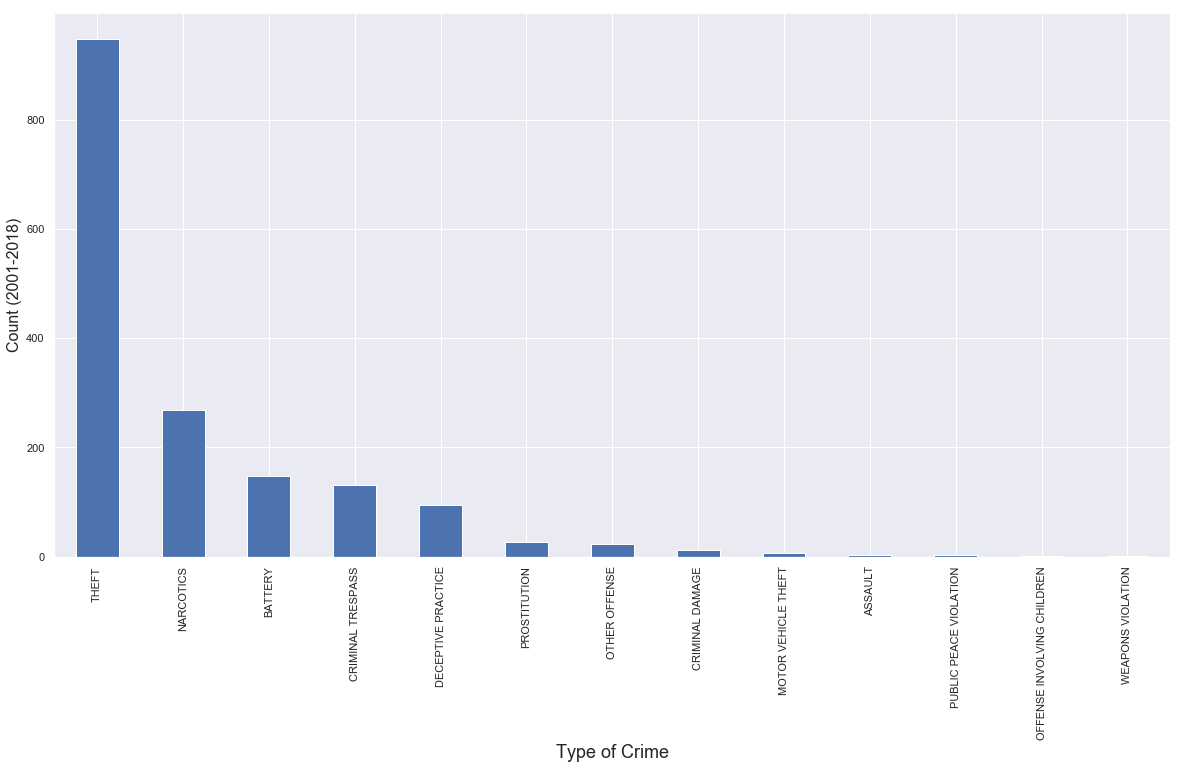

In [6]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
df_result['primary_type'].value_counts().plot(kind="bar")
plt.xlabel('Type of Crime', fontsize=18)
plt.ylabel('Count (2001-2018)', fontsize=16)
plt.show()

In [7]:
df_result_maincrime = df_result.loc[df_result['primary_type'].isin(['THEFT','NARCOTICS'])].reset_index(drop=True)
df_result_maincrime.head()

,primary_type,number_cases,year,latitude,longitude
0,THEFT,61,2018,41.757614,-87.586115
1,THEFT,62,2002,41.757614,-87.586115
2,THEFT,53,2003,41.757614,-87.586115
3,THEFT,64,2015,41.757614,-87.586115
4,THEFT,92,2005,41.757614,-87.586115


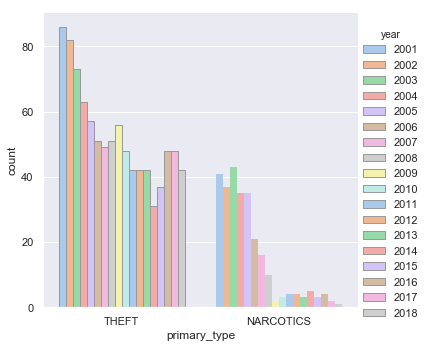

In [8]:
plt.figure()
sns.set(style='darkgrid')
sns.catplot(x="primary_type", hue="year", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_result_maincrime);
# sns.set(rc={'figure.figsize':(20,30)})
plt.show()

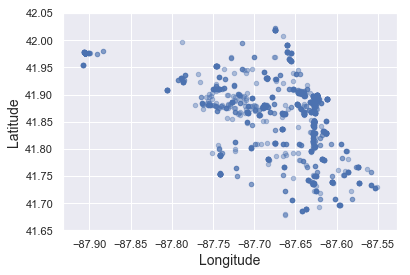

In [11]:
plt.figure(figsize=(20,10))
# df_result_2004 = df_result.loc[df_result['year']== 2004].reset_index(drop=True)

df_result.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.show()

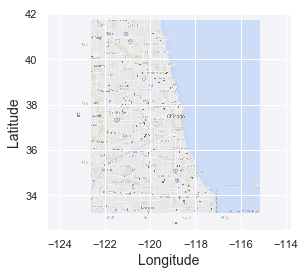

In [10]:
import matplotlib.image as mpimg

plt.figure(figsize=(20,10))
# df_result_2004 = df_result.loc[df_result['year']== 2004].reset_index(drop=True)

chicago_image=mpimg.imread('chicago.png')

df_result.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)

plt.imshow(chicago_image, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.show()